Dataset: https://drive.google.com/drive/folders/1B0t3pY8nkTFNzlW8Wrjir9JMzVdRVk4k?usp=sharing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from google.colab import drive

In [2]:
import os
import cv2

import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, MaxPooling2D
from tensorflow.keras.layers import Flatten, Dense, Dropout, Activation
from tensorflow.keras import Model, regularizers, optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow import keras
from tensorflow.keras.optimizers import Adam

In [3]:
drive.mount('/content/drive')

Mounted at /content/drive


In [22]:
%cd 'enter path here..'

/content/drive/MyDrive/Indonesia AI/Computer Vision


In [4]:
main_dir = 'enter path here..'

In [5]:
train_path = os.path.join(main_dir, 'train')
val_path = os.path.join(main_dir, 'validation')

#Load Data

In [6]:
labels = ['pumpkin', 'tomato', 'watermelon'] # 0, 1, 2
img_size = 224 # refers to paper

def get_data(data_dir):
    data = [] 
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img))
                img_arr = cv2.cvtColor(img_arr, cv2.COLOR_BGR2RGB)
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

In [7]:
train_data = get_data(train_path)

<ipython-input-6-82fa1a21739e>:17: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(data)


In [8]:
test_data = get_data(val_path)

<ipython-input-6-82fa1a21739e>:17: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(data)


In [9]:
train_data.shape

(3302, 2)

In [10]:
test_data.shape

(824, 2)

# Data Visualization

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


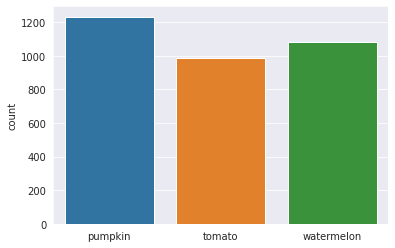

In [11]:
import seaborn as sns

cls_plot = []
for i in train_data:
    if(i[1] == 0):
        cls_plot.append('pumpkin')
    elif (i[1] == 1):
        cls_plot.append('tomato')
    else:
        cls_plot.append("watermelon")

sns.set_style('darkgrid')
sns.countplot(cls_plot)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


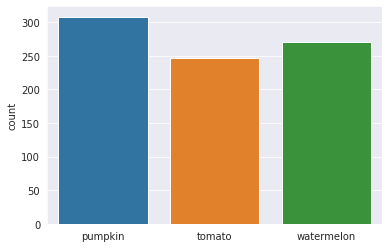

In [12]:
import seaborn as sns

cls_plot = []
for i in test_data:
    if(i[1] == 0):
        cls_plot.append('pumpkin')
    elif (i[1] == 1):
        cls_plot.append('tomato')
    else:
        cls_plot.append("watermelon")

sns.set_style('darkgrid')
sns.countplot(cls_plot)

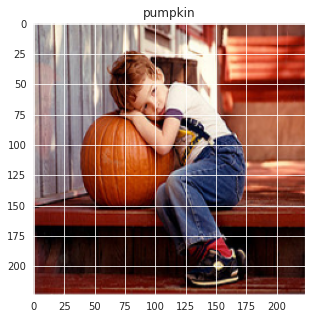

In [13]:
plt.figure(figsize=(5,5))
plt.imshow(train_data[0][0])
plt.title(labels[train_data[0][1]])
plt.show()

# Data Pre-Processing

In [14]:
train_images = []
train_labels = []

val_images = []
val_labels = []

for feature, label in train_data:
  train_images.append(feature)
  train_labels.append(label)

for feature, label in test_data:
  val_images.append(feature)
  val_labels.append(label)

# Normalize the data
train_images = np.array(train_images) / 255
val_images = np.array(val_images) / 255

# Convert to array
train_labels = np.array(train_labels)
val_labels = np.array(val_labels)

In [15]:
# one hot encode the labels
train_labels = keras.utils.to_categorical(train_labels, 3)
val_labels = keras.utils.to_categorical(val_labels, 3)

In [16]:
print(train_images.shape)
print(val_images.shape)
print(train_labels.shape)
print(val_labels.shape)

(3302, 224, 224, 3)
(824, 224, 224, 3)
(3302, 3)
(824, 3)


In [23]:
import numpy as np

np.save('val_images.npy', val_images)
np.save('val_labels.npy', val_labels)

# Deep Learning Architecture

In [17]:
model = keras.Sequential()
weight_decay = 0.0005
model_input = (224, 224, 3)

model.add(Conv2D(64, (3, 3), padding='same', input_shape=model_input, kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Conv2D(64, (3, 3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(128, (3, 3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(256, (3, 3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(256, (3, 3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(512, (3, 3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(512, (3, 3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(512, (3, 3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(512, (3, 3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(512, (3, 3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(512, (3, 3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(512, kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(Dropout(0.5))
model.add(Dense(3))
model.add(Activation('softmax'))

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 64)      1792      
                                                                 
 activation (Activation)     (None, 224, 224, 64)      0         
                                                                 
 batch_normalization (BatchN  (None, 224, 224, 64)     256       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 224, 224, 64)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 64)      36928     
                                                                 
 activation_1 (Activation)   (None, 224, 224, 64)      0         
                                                        

In [19]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Training

In [24]:
# Save the checkpoint in the /output folder
directory = '/content/drive/MyDrive/Indonesia AI/Computer Vision/'
file_path = os.path.join(directory, 'VGG_model.h5')

In [20]:
from tensorflow.keras.callbacks import ModelCheckpoint

# Keep only a single checkpoint, the best over test accuracy.
checkpoint = ModelCheckpoint(filepath=file_path, monitor="val_accuracy", mode="max", save_best_only=True, verbose=1)

history = model.fit(train_images, train_labels, validation_data=(val_images, val_labels), epochs=30, batch_size=32, callbacks=[checkpoint])

Epoch 1/30
104/104 [==============================] - ETA: 0s - loss: 4.1211 - accuracy: 0.5006
Epoch 1: val_accuracy improved from -inf to 0.29854, saving model to /content/drive/MyDrive/Indonesia AI/Computer Vision/VGG_model.h5
104/104 [==============================] - 94s 734ms/step - loss: 4.1211 - accuracy: 0.5006 - val_loss: 28.9588 - val_accuracy: 0.2985
Epoch 2/30
104/104 [==============================] - ETA: 0s - loss: 3.9922 - accuracy: 0.6102
Epoch 2: val_accuracy improved from 0.29854 to 0.32767, saving model to /content/drive/MyDrive/Indonesia AI/Computer Vision/VGG_model.h5
104/104 [==============================] - 66s 632ms/step - loss: 3.9922 - accuracy: 0.6102 - val_loss: 5.7066 - val_accuracy: 0.3277
Epoch 3/30
104/104 [==============================] - ETA: 0s - loss: 3.7281 - accuracy: 0.6593
Epoch 3: val_accuracy improved from 0.32767 to 0.32888, saving model to /content/drive/MyDrive/Indonesia AI/Computer Vision/VGG_model.h5
104/104 [==========================

# Evaluation

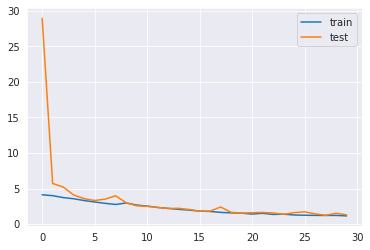

In [21]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.savefig("Loss Graph")
plt.show()

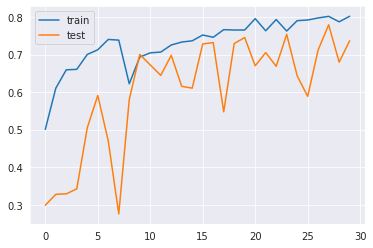

In [22]:
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.savefig("Accuracy Graph")
plt.show()

In [25]:
from keras.models import load_model

h5model = load_model(file_path)

In [51]:
val_images = np.load('val_images.npy')
val_labels = np.load('val_labels.npy')

In [52]:
# val_predictions = h5model.predict(val_images)

26/26 [==============================] - 410s 16s/step


In [68]:
# np.save('val_predictions.npy', val_predictions)

In [69]:
val_predictions = np.load('val_predictions.npy')

In [53]:
def predict(index):
  y_pred = val_predictions[index]
  y_real = val_labels[index]
  img = val_images[index]

  pred_label = np.argmax(y_pred)
  real_label = np.argmax(y_real)

  if pred_label == real_label:
    print('PREDICTION CORRECT')
  else:
    print('MISCLASSIFICATION')

  print('Predicted Label: ', labels[pred_label])
  print('Real/True Label: ', labels[real_label])

  plt.imshow(img)
  plt.show()

MISCLASSIFICATION
Predicted Label:  tomato
Real/True Label:  pumpkin


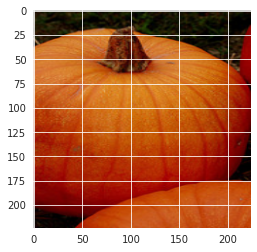

In [67]:
import random

index = random.randint(0, len(val_images)-1)
predict(index)

In [55]:
from sklearn.metrics import classification_report

le_predictions = np.argmax(val_predictions, axis=1)
le_labels = np.argmax(val_labels, axis=1)

In [57]:
print(classification_report(le_labels, le_predictions, target_names=labels))

              precision    recall  f1-score   support

     pumpkin       0.80      0.88      0.84       308
      tomato       0.70      0.79      0.74       246
  watermelon       0.85      0.66      0.74       270

    accuracy                           0.78       824
   macro avg       0.78      0.77      0.77       824
weighted avg       0.79      0.78      0.78       824

